# Predicting Diabetes with Decision Trees

## Project Overview
This project aims to predict whether a patient has diabetes based on diagnostic measures using decision tree algorithms. The dataset originally comes from the National Institute of Diabetes and Digestive and Kidney Diseases.

## Dataset Description
The dataset contains the following variables:
- **Pregnancies**: Number of pregnancies of the patient (numeric)
- **Glucose**: Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)
- **BloodPressure**: Diastolic blood pressure (measured in mm Hg) (numeric)
- **SkinThickness**: Triceps skin fold thickness (measured in mm) (numeric)
- **Insulin**: 2-hour serum insulin (measured in mu U/ml) (numeric)
- **BMI**: Body mass index (numeric)
- **DiabetesPedigreeFunction**: Diabetes Pedigree Function (numeric)
- **Age**: Age of patient (numeric)
- **Outcome**: Class variable (0 or 1), being 0 negative in diabetes and 1 positive (numeric)

## Step 1: Loading the Dataset

We'll load the diabetes dataset from the provided URL. The dataset will be stored in our data folder for further analysis.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the diabetes dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"

# Load dataset directly from URL
df = pd.read_csv(url)
        
# Save dataset to local data folder for future use
df.to_csv('/workspaces/tgedin_machine_learning_python_template/data/diabetes.csv', index=False)
    
# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"Dataset columns: {list(df.columns)}")
print("\nFirst few rows:")
df.head()

Dataset shape: (768, 9)
Dataset columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

First few rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Step 2: Exploratory Data Analysis (EDA)

Now we'll explore the dataset to understand its structure, identify missing values, detect outliers, and determine the most relevant features for predicting diabetes.

In [3]:
# Dataset overview
print("Dataset Information:")
print(f"Shape: {df.shape}")
print(f"Data types:\n{df.dtypes}")
print(f"\nTarget distribution:")
print(df['Outcome'].value_counts())
print(f"\nBasic statistics:")
df.describe()

Dataset Information:
Shape: (768, 9)
Data types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Target distribution:
Outcome
0    500
1    268
Name: count, dtype: int64

Basic statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 2.1 Missing Values and Data Quality Analysis

Let's check for missing values and understand the data quality issues in our dataset.

In [4]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Check for zero values (which might be missing data in medical context)
print("\nZero values in each column:")
zero_counts = (df == 0).sum()
print(zero_counts)

# Identify suspicious zero values (medical measurements that shouldn't be zero)
suspicious_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\nSuspicious zero values in medical measurements:")
for col in suspicious_columns:
    zero_pct = (df[col] == 0).mean() * 100
    print(f"{col}: {zero_pct:.1f}% zeros")

Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Zero values in each column:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Suspicious zero values in medical measurements:
Glucose: 0.7% zeros
BloodPressure: 4.6% zeros
SkinThickness: 29.6% zeros
Insulin: 48.7% zeros
BMI: 1.4% zeros


### 2.2 Feature Analysis and Correlation

Let's analyze the relationships between features and their correlation with the target variable (Outcome).

Correlation with Outcome (target):
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


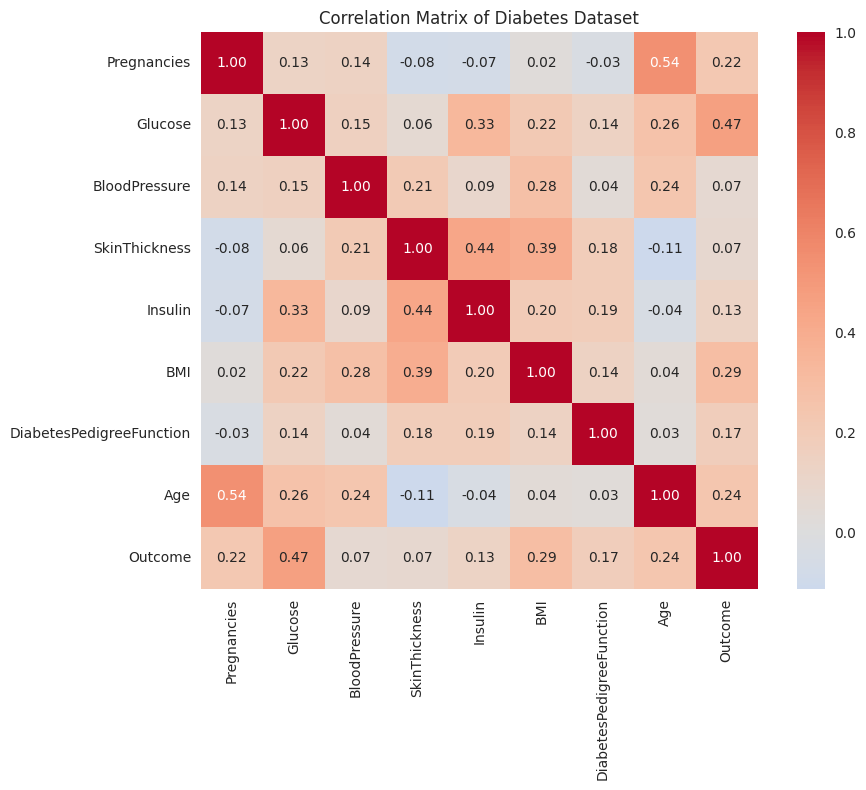

In [5]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Display correlation with target variable
print("Correlation with Outcome (target):")
target_corr = correlation_matrix['Outcome'].sort_values(key=abs, ascending=False)
print(target_corr[target_corr.index != 'Outcome'])

# Create a simple correlation visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Diabetes Dataset')
plt.tight_layout()
plt.show()

### 2.3 Data Cleaning with KNN Imputation

Instead of using median replacement (which can be problematic with >20% missing values), we'll use KNN imputation. This method uses the K-nearest neighbors of each sample to estimate missing values, preserving the underlying data relationships and providing more accurate imputations for medical data.

In [9]:
# Import KNN imputer
from sklearn.impute import KNNImputer

# Create a copy of the dataset for cleaning
df_cleaned = df.copy()

# Replace zero values with NaN for medical measurements that shouldn't be zero
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns_to_clean:
    df_cleaned[col] = df_cleaned[col].replace(0, np.nan)

# Check missing data percentage
missing_pct = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
print("Missing values after marking zeros as NaN:")
for col in columns_to_clean:
    if missing_pct[col] > 0:
        print(f"  {col}: {missing_pct[col]:.1f}%")

# Apply KNN imputation (k=5 neighbors)
knn_imputer = KNNImputer(n_neighbors=5)
df_cleaned[columns_to_clean] = knn_imputer.fit_transform(df_cleaned[columns_to_clean])

print(f"\nKNN imputation completed with k=5 neighbors")
print(f"Dataset shape: {df_cleaned.shape}")
print("Missing values after KNN imputation:", df_cleaned.isnull().sum().sum())

Missing values after marking zeros as NaN:
  Glucose: 0.7%
  BloodPressure: 4.6%
  SkinThickness: 29.6%
  Insulin: 48.7%
  BMI: 1.4%

KNN imputation completed with k=5 neighbors
Dataset shape: (768, 9)
Missing values after KNN imputation: 0


### 2.4 Feature Selection and Relevance Analysis

Let's identify the most relevant features for predicting diabetes based on correlation analysis and domain knowledge.

In [10]:
# Analyze feature importance based on correlation with target
feature_importance = df_cleaned.corr()['Outcome'].abs().sort_values(ascending=False)
print("Feature importance (absolute correlation with Outcome):")
print(feature_importance[feature_importance.index != 'Outcome'])

# Define thresholds for feature selection
high_correlation_threshold = 0.15
relevant_features = feature_importance[feature_importance > high_correlation_threshold].index.tolist()
relevant_features.remove('Outcome')  # Remove target variable

print(f"\nFeatures with correlation > {high_correlation_threshold}:")
for feature in relevant_features:
    corr_val = df_cleaned.corr().loc[feature, 'Outcome']
    print(f"  {feature}: {corr_val:.3f}")

# Create final dataset with selected features
features_to_keep = relevant_features + ['Outcome']
df_final = df_cleaned[features_to_keep].copy()

print(f"\nFinal dataset shape: {df_final.shape}")
print(f"Selected features: {relevant_features}")
print(f"Features removed: {[col for col in df_cleaned.columns if col not in features_to_keep]}")

Feature importance (absolute correlation with Outcome):
Glucose                     0.492195
Insulin                     0.336597
BMI                         0.313529
SkinThickness               0.276721
Age                         0.238356
Pregnancies                 0.221898
BloodPressure               0.178727
DiabetesPedigreeFunction    0.173844
Name: Outcome, dtype: float64

Features with correlation > 0.15:
  Glucose: 0.492
  Insulin: 0.337
  BMI: 0.314
  SkinThickness: 0.277
  Age: 0.238
  Pregnancies: 0.222
  BloodPressure: 0.179
  DiabetesPedigreeFunction: 0.174

Final dataset shape: (768, 9)
Selected features: ['Glucose', 'Insulin', 'BMI', 'SkinThickness', 'Age', 'Pregnancies', 'BloodPressure', 'DiabetesPedigreeFunction']
Features removed: []


### 2.5 Outlier Detection and Final Data Summary

Let's check for outliers in our selected features and provide a final summary of the cleaned dataset.

In [11]:
# Quick outlier check using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

print("Outlier count in selected features:")
for feature in relevant_features:
    outlier_count = detect_outliers(df_final, feature)
    outlier_pct = (outlier_count / len(df_final)) * 100
    print(f"  {feature}: {outlier_count} outliers ({outlier_pct:.1f}%)")

# Final dataset summary
print(f"\n=== FINAL DATASET SUMMARY ===")
print(f"Original dataset shape: {df.shape}")
print(f"Final dataset shape: {df_final.shape}")
print(f"Features selected: {len(relevant_features)}")
print(f"Target distribution:")
print(df_final['Outcome'].value_counts(normalize=True))

# Save the cleaned dataset
df_final.to_csv('/workspaces/tgedin_machine_learning_python_template/data/diabetes_cleaned.csv', index=False)
print(f"\nCleaned dataset saved to: /workspaces/tgedin_machine_learning_python_template/data/diabetes_cleaned.csv")

Outlier count in selected features:
  Glucose: 0 outliers (0.0%)
  Insulin: 30 outliers (3.9%)
  BMI: 8 outliers (1.0%)
  SkinThickness: 4 outliers (0.5%)
  Age: 9 outliers (1.2%)
  Pregnancies: 4 outliers (0.5%)
  BloodPressure: 14 outliers (1.8%)
  DiabetesPedigreeFunction: 29 outliers (3.8%)

=== FINAL DATASET SUMMARY ===
Original dataset shape: (768, 9)
Final dataset shape: (768, 9)
Features selected: 8
Target distribution:
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

Cleaned dataset saved to: /workspaces/tgedin_machine_learning_python_template/data/diabetes_cleaned.csv


## Step 3: Data Preparation and Train-Test Split

Now we'll prepare the final dataset by separating features and target, then split into training and testing sets. The splits will be saved for reproducible model training and evaluation.

In [12]:
import os

# Create directory for processed data
output_dir = '/workspaces/tgedin_machine_learning_python_template/data/processed/Diabetes_dataset'
os.makedirs(output_dir, exist_ok=True)

# Separate features and target
X = df_final.drop('Outcome', axis=1)
y = df_final['Outcome']

# Split the data (80% train, 20% test, stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# Save the split datasets
X_train.to_csv(f'{output_dir}/X_train.csv', index=False)
X_test.to_csv(f'{output_dir}/X_test.csv', index=False)
y_train.to_csv(f'{output_dir}/y_train.csv', index=False)
y_test.to_csv(f'{output_dir}/y_test.csv', index=False)

print("Data split completed:")
print(f"  Training set: {X_train.shape[0]} samples")
print(f"  Test set: {X_test.shape[0]} samples")
print(f"  Features: {X_train.shape[1]}")
print(f"  Target classes: {y.unique()}")

print(f"\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

print(f"\nFiles saved to: {output_dir}")
print(f"  X_train.csv: {X_train.shape}")
print(f"  X_test.csv: {X_test.shape}")
print(f"  y_train.csv: {y_train.shape}")
print(f"  y_test.csv: {y_test.shape}")

Data split completed:
  Training set: 614 samples
  Test set: 154 samples
  Features: 8
  Target classes: [1 0]

Class distribution in training set:
Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64

Files saved to: /workspaces/tgedin_machine_learning_python_template/data/processed/Diabetes_dataset
  X_train.csv: (614, 8)
  X_test.csv: (154, 8)
  y_train.csv: (614,)
  y_test.csv: (154,)
